# Forweuler, fourth-order Runge-Kutta, Bogacki-Shampine method, fourth-order Adams-Bashforth and predictor-corrector methods.

The provided script is part of the homework for the Numerical Analysis course at the University of Southern Mississippi.

In [1]:
import numpy as np
import math

def forweuler(F,tspan,y0,h):
    """
    forweuler: uses forward Euler to solve y' = F(t,y)
    on time interval tspan[0] < t <= tspan[1]
    with initial condition y(tspan[0]) = y0
    and fixed time step h
    output: return lists T and Y of t- and y-values
    """
    if len(tspan)<2:
        raise Exception('invalid time span!')
    # get initial and final times
    t0=tspan[0]
    tf=tspan[1]
    # t is current time
    t=t0
    # make sure solution is a float
    if np.isscalar(y0): # scalar or vector?
        y=float(y0)
    else:
        y=np.array(y0,dtype=float)
    # how many time steps?
    n=round((tf-t0)/h)
    # initialize storage of solution
    T=[t]
    Y=[y]
    for i in range(n):
        # main step of Euler's method
        y=y+h*F(t,y)
        t+=h
        # store new values
        T.append(t) # pass new ELEMENT of list as argument
        Y.append(y)
    return T,Y

# Homework 1: implement the following
# higher-order methods
    
def rk4(F,tspan,y0,h):
    # implement fourth-order Runge-Kutta
    if len(tspan)<2:
        raise Exception('invalid time span!')
    t0=tspan[0]
    tf=tspan[1]
    
    t=t0
    if np.isscalar(y0):
        y1=float(y0)
        #y2=float(y0)
        #y=[y1,y2]
    else:
        y1=np.array(y0,dtype=float)
        #y2=np.array(y0,dtype=float)
    n=round((tf-t0)/h)
    #y.array.RK4 = np.zeros(n)
    T1=[t]
    Y1=[y1]
    #Y2=[y2]
    for i in range(n):
        k1=h*F(t,y1)
        k2=h*F(t+ h*0.5,y1+ k1*0.5)
        k3=h*F(t+ h*0.5,y1+ k2*0.5)
        k4=h*F(t+h,y1+k3)
        #t[i] = tspan[0] + i * h
        y1=y1+ 1/6 * (k1+ 2*k2+ 2*k3+k4)
        t=t+h
        
        
        #k1=h*F(t,y1)
        #k2=h*F(t+h/2,y1+k1/2)
        #k3=h*F(t+h/2,y1+k2/2)
        #k4=h*F(t,y1+k3)
        #y2=y1+1/6*(k1+2*k2+2*k3+k4)
        
        #t=t+h
        # store new values
        T1.append(t) # pass new ELEMENT of list as argument
        Y1.append(y1)
        #Y2.append(y2)
    return T1,Y1#,Y2
    # from equation (12.20) in text
    # very
    #similar to forweuler
    
    # checking order of accuracy (for 
    # any method except ode23):
    
    # test with two different h-values, does
    # error decrease like h^p?
    
    #pass

def ode23(F,tspan,y0,h,tol):
    # implement Bogacki-Shampine method 
    if len(tspan)<2:
        raise Exception('invalid time span!')
    # get initial and final times
    t0=tspan[0]
    tf=tspan[1]
    # t is current time
    t=t0
    # make sure solution is a float
    if np.isscalar(y0): # scalar or vector?
        y=float(y0)
    else:
        y=np.array(y0,dtype=float)
    # how many time steps?
    #n=round((tf-t0)/h)
    # initialize storage of solution
    T=[t]
    Y=[y]
    k1=F(t,y)
    #for i in range(n):
        
    # (used in MATLAB ode23)
        
        
    # look up this method for stages
    # refer to Section 12.5 in text 
    # for info on adaptive time-stepping
    
    # initialization just like forweuler and rk4
    
    # while loop needed because we don't know
    # number of time steps
    
    while t < tf:
        k2=F(t+ 1/2 *h,y+ 1/2 *h*k1)
        k3=F(t+ 3/4 *h,y+ 3/4 *h*k2)
        yn=y.copy()
        y=y+ 2/9 *h*k1 + 1/3 *h*k2 + 4/9 *h*k3
        k4=F(t+h,y)
        z=yn+ 7/24 *h*k1+ 1/4 *h*k2+ 1/3 *h*k3+ 1/8 *h*k4
    
        # compute required stages and y's 
        if np.isscalar(y):
            err=abs(z-y)
        else:
            err=np.linalg.norm(z-y,np.inf)
        # for both RK methods y_n+1, ~y_n+1
        
        # step size control: use both y's 
        # to obtain error estimate. check 
        # whether y's are scalars or vectors!
        
        # if vectors, use infinity-norm for 
        # error estimate
        
        # compute timestep scaling factor q
        # from formula on p. 503 in text
        q=(tol*h/err)**(1/2)
        
        if q<1:
        
            # reject y, reuse k1 with 
            # decreased time step
            h=q*h
            y=yn.copy()
        else:
        
            # accept y, use fact that method
            # is FSAL (see text) to obtain
            # k1 for NEXT time step efficiently
            
            # update t, T and Y as in forweuler
            
        # scale h for next time step
        
    # return solution as in forweuler
    #T.append(t) # pass new ELEMENT of list as argument
    #Y.append(y)
            t=t+h
            h=q*h
            k1=k4.copy()
            T.append(t) 
            Y.append(y)
    return T,Y
    #pass

def ab4(F,tspan,y0,h):
    # implement fourth-order Adams-Bashforth
    # method (equation (12.25) in text)
    if len(tspan)<2:
        raise Exception('invalid time span')
    # extract t and tf as before
    t0=tspan[0]
    tf=tspan[1]
    # use rk4 to obtain starting values
    T,Y=rk4(F,tspan,y0,h)
    # what parameters are needed for that?
    # use T,Y as output from rk4 AND this
    # function for convenience
    
    # extract all starting values from 
    # lists T,Y returned by rk4 (acccess T[0], Y[0], etc.)
    tn1=T[0]
    tn2=T[1]
    tn3=T[2]
    tn4=T[3]
    
    y1=Y[0]
    y2=Y[1]
    y3=Y[2]
    y4=Y[3]
    # use starting values to obtain initial
    # F-values
    Fn0=F(tn1,y1)
    Fn1=F(tn2,y2)
    Fn2=F(tn3,y3)
    Fn3=F(tn4,y4)
    # set t,y based on last starting value
    t=tn4
    y=y4
    T=[tn1,tn2,tn3,tn4]
    Y=[y1,y2,y3,y4]
    # determine number of time steps n
    n=round((tf-t0)/h)
    # time-stepping loop:
    for i in range(3,n):
        # compute new y from (12.25)
        y=y+h/24*(55*Fn3-59*Fn2+37*Fn1-9*Fn0)
        t+=h
        # update t, T and Y as in other functions
        T.append(t)
        Y.append(y)
        # update F-values for next time step
        Fn0=Fn1
        Fn1=Fn2
        Fn2=Fn3
        Fn3=F(t,y)
        
    
    # return solution
    return T,Y
    #pass

def pe4(F,tspan,y0,h):
    # implement predictor-corrector method
    # using fourth-order Adams-Bashforth
    # and Adams-Moulton methods (12.25, 12.26)
    
    # read about predictor-corrector methods in
    # section 12.3.2, see example 12.3.2
    
    # begin just as in ab4 to get starting 
    # values and set up time-stepping loop
    if len(tspan)<2:
        raise Exception('invalid time span')
    # time-stepping loop:
    t0=tspan[0]
    tf=tspan[1]
    T,Y=rk4(F,tspan,y0,h)
        # predict

        # evaluate

        # correct
        
        # update and set up next time-step
        # as in ab4
    tn1=T[0]
    tn2=T[1]
    tn3=T[2]
    tn4=T[3]
    
    y1=Y[0]
    y2=Y[1]
    y3=Y[2]
    y4=Y[3]
    
    Fn0=F(tn1,y1)
    Fn1=F(tn2,y2)
    Fn2=F(tn3,y3)
    Fn3=F(tn4,y4)
    t=tn4
    y=y4
    T=[tn1,tn2,tn3,tn4]
    Y=[y1,y2,y3,y4]
    # determine number of time steps n
    n=round((tf-t0)/h)
    # time-stepping loop:
    for i in range(3,n):
    
        # compute new y from (12.25)
        yn=y.copy()
        y=y+h/24*(55*Fn3-59*Fn2+37*Fn1-9*Fn0)
        
        Fn4=F(t+h,y)
        
        y=yn+h/24*(9*Fn4+19*Fn3-5*Fn2+Fn1)
        t+=h
        # update t, T and Y as in other functions
        T.append(t)
        Y.append(y)
        
        # update F-values for next time step
        Fn0=Fn1
        Fn1=Fn2
        Fn2=Fn3
        Fn3=F(t,y)
        
    
    # return solution
    return T,Y
    #pass

Test above methods using a test function and calculate the error as well.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
<class 'list'>


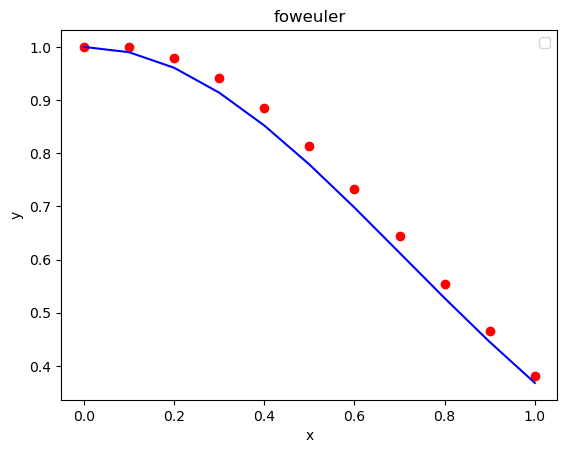

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


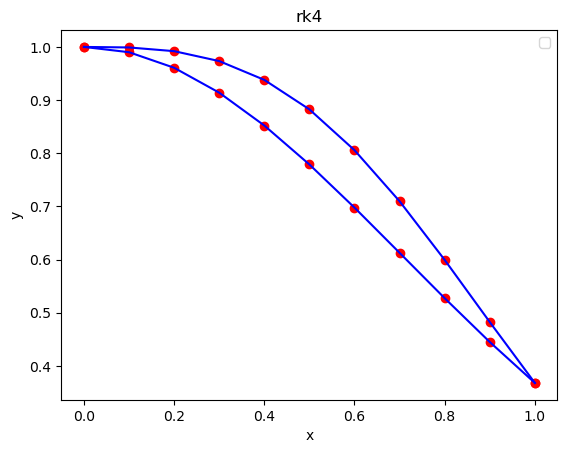

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


err
7.692112142854146e-06
[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
<class 'list'>
[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
<class 'list'>
hp
0.0016356025847987115
[0, 0.028284961313758787, 0.0565699226278321, 0.08486601023687927, 0.11320238024181992, 0.14162802896926327, 0.17021327304834447, 0.19905285678815177, 0.22827167715271135, 0.2580348115716963, 0.28856505432682644, 0.32017466340492734, 0.35332686420069004, 0.38876839087909276, 0.42495328504781366, 0.460585666862649, 0.4958811789251696, 0.5310286759863985, 0.5661761730485108, 0.6013506081565608, 0.6353697051485432, 0.665731231939272, 0.6938594612612313, 0.7203954034557799, 0.74575904888531, 0.7702468722350566, 0.7940821402411293, 0.8174428437347319, 0.8404785730071163, 0.8633216307883529, 0.8860950987649467, 0.9088686061879585, 0.9316929280208619, 0.9546915417392564, 0.97799596632960

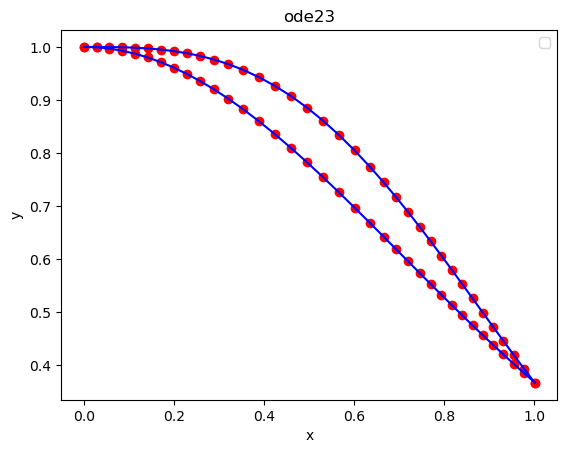

6.787466031443756e-07
[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
<class 'list'>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


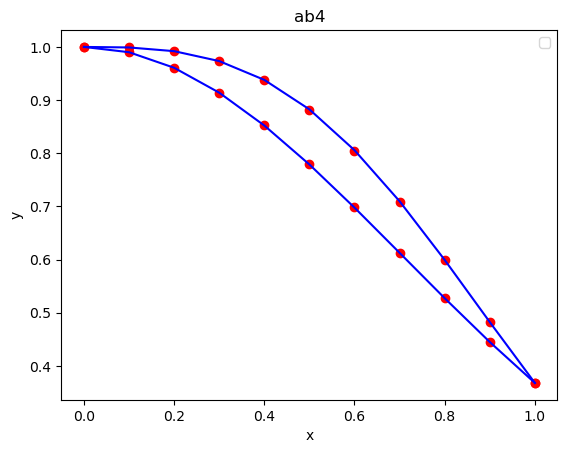

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


err
0.001105520542426519
[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
<class 'list'>


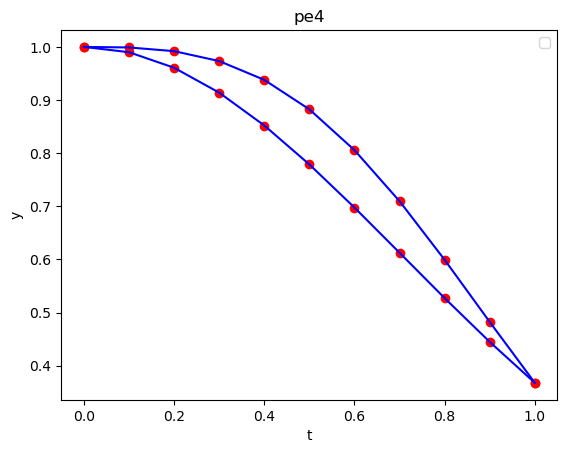

err
0.0001830662238435643


In [2]:
import odesolve
import matplotlib.pyplot as plt
import math
import numpy as np

# throughout, "array" refers to numpy ndarray

def myodefunc1(t,y):
    # time derivative for y' = -2t y
    return (-2*t*y)

# Homework 1: Implement this function
def myodefunc2(t,y):
    # implement y1' = -2t y1, y2' = -3t^2 y2
    dy1 = -2*t*y[0]
    dy2 = -3*t**2*y[1]
    # assume y is an array, return an array
    dy=np.array([dy1,dy2])
    return dy
    ##return [-2*t*y,-3*t**2*y]
    ##pass

def exactsoln1(T):
    # this returns list of solution values
    # assumed initial condition y(0) = 1
    print(T)
    return [ math.exp(-t**2) for t in T ]

# Homework 1: Implement this function
def exactsoln2(T1):
    # what is exact solution? exp(-t**2) and exp(-t**3)
    #Y1exact=np.array([math.exp(-t**2) for t in T])
    #Y2exact=np.array([math.exp(-t**3) for t in T])
    # assume initial conditions y1(0) = y2(0) = 1
    # return list of arrays [ y1(t), y2(t) ] for each t
    print(T)
    print(type(T1))
    #print(type(T1))
    #return [Y1exact,Y2exact]
    return [np.array([math.exp(-t**2),math.exp(-t**3)]) for t in T1]
    #pass

if __name__ == "__main__":
        
    # this statement uses Forward Euler to solve 
    # ODE 1 for 0 < t <= 1, y(0) = 1 with h=0.1
    T,Y=odesolve.forweuler(myodefunc1,[0,1],1,0.1)
    T1,Y1=odesolve.rk4(myodefunc2,[0,1],[1,1],0.1)
    # T2,Y2=odesolve.rk4(myodefunc2,[0,1],[1,1],0.001)
    # Homework 1: solve both IVPs using your ode23
    # and predictor-corrector method
    
    Yexact=exactsoln1(T)
    Y1exact=exactsoln2(T1)
    #Yexact=exactsoln2(T)
   #Y2exact=exactsoln2(T1)
    # Homework 1:
    # plot computed solution against T with red circles
    plt.plot(T,Y,'ro')
    # plot exact solution evaluated at T as blue curve
    plt.plot(T,Yexact,'b')
    # label horizontal (t) and vertical (y) axes
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('foweuler')
    plt.legend()
    plt.show()
    
    plt.plot(T1,Y1,'ro')
    #plt.plot(T,Y2,'ro')
    plt.plot(T1,Y1exact,'b')
    #plt.plot(T,Y2exact,'b')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('rk4')
    plt.legend()
    plt.show()
    
    y=np.array(Y1)
    z=np.array(Y1exact)
    err=np.linalg.norm(y-z,np.inf)
    print('err')
    print(err)
    
    #c=np.array(Y1exact-err)
    #T1,Y=odesolve.rk4(myodefunc2,[0,1],[1,1],0.001)
    #y=np.array(Y)
    #z=np.array(Y1exact)
    #err=np.linalg.norm(y-z,np.inf)
    #print(err)
    #hp=np.array(err/err1)
    
    T2,Y2=odesolve.rk4(myodefunc2,[0,1],[1,1],0.01)
    T3,Y3=odesolve.rk4(myodefunc2,[0,1],[1,1],0.05)
    y2=np.array(Y2)
    Y2exact=exactsoln2(T2)
    z2=np.array(Y2exact)
    err2=np.linalg.norm(y2-z2,np.inf)
    
    y3=np.array(Y3)
    Y3exact=exactsoln2(T3)
    z3=np.array(Y3exact)
    err3=np.linalg.norm(y3-z3,np.inf)
    
    hp=err2/err3
    print('hp')
    print(hp)
    
    #plt.plot(T1,Y1,T2,Y2,'ro','bo')
    #plt.plot(T,Y2,'ro')
    #plt.plot(T1,Y1exact,'b')
    #plt.plot(T,Y2exact,'b')
    #plt.xlabel('x')
    #plt.ylabel('y')
    #plt.title('rk4 err')
    #plt.legend()
    #plt.show()
    
   # Y1exact=exactsoln2(T1)
    T,Y=odesolve.ode23(myodefunc2,[0,1],[1,1],0.1,0.0001)
    Y1exact=exactsoln2(T)
    plt.plot(T,Y,'ro')
    #plt.plot(T,Y2,'ro')
    #plt.plot(T1,Y1exact,'b')
    plt.plot(T,Y1exact,'b') #we are deling with exact solution that we found earlier for rk4
    #plt.plot(T,Y2exact,'b')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('ode23')
    plt.legend()
    plt.show()
    
    y=np.array(Y)
    z=np.array(Y1exact)
    #A=len (y)
    #B=len (z)
    #z1=np.transpose(z)
    err=np.linalg.norm(y-z,np.inf)
    print(err)
    #input('paused')
    
    T,Y=odesolve.ab4(myodefunc2,[0,1],[1,1],0.1)
    Y1exact=exactsoln2(T)
    plt.plot(T,Y,'ro')
    #plt.plot(T,Y2,'ro')
    #plt.plot(T1,Y1exact,'b')
    plt.plot(T1,Y1exact,'b') #we are deling with exact solution that we found earlier for rk4
    #plt.plot(T,Y2exact,'b')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('ab4')
    plt.legend()
    plt.show()
    
    y=np.array(Y)
    z=np.array(Y1exact)
    err=np.linalg.norm(y-z,np.inf)
    print('err')
    print(err)
    
    T,Y=odesolve.pe4(myodefunc2,[0,1],[1,1],0.1)
    Y1exact=exactsoln2(T1) 

    plt.plot(T,Y,'ro')
    plt.plot(T,Y1exact,'b')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('pe4')
    plt.legend()
    plt.show()
    
    y=np.array(Y)
    z=np.array(Y1exact)
    err=np.linalg.norm(y-z,np.inf)
    print('err')
    print(err)
    # Homework 1:
    # create arrays y1 and y2 both Y and Yexact
    # compute and print infinity-norm of error
    # using norm function from numpy.linalg
    # consult documentation (link on Resources 
    # page) to see how to get infinity-norm 
    # instead of default 2-norm
